In [35]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
# Load Talcher data
df = pd.read_csv("extracted_data.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Talcher,2017-12-22,NaN,NaN,NaN,NaN,NaN,NaN,5.15,NaN,0.02,NaN,NaN,NaN,NaN,NaN
1,Talcher,2017-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Talcher,2017-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Talcher,2017-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talcher,2017-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ex_talcher_data = df.iloc[49:924] 
ex_talcher_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
49,Talcher,2018-02-09,172.05,381.02,48.00,45.34,93.33,10.19,2.62,NaN,17.65,NaN,NaN,NaN,321.0,Very Poor
50,Talcher,2018-02-10,143.05,314.95,83.26,55.96,139.18,9.55,2.56,NaN,11.32,NaN,NaN,NaN,343.0,Very Poor
51,Talcher,2018-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Talcher,2018-02-12,117.74,264.67,19.07,27.17,46.24,9.65,1.62,38.32,28.32,0.0,0.0,NaN,NaN,NaN
53,Talcher,2018-02-13,173.67,411.74,33.86,54.41,88.22,8.64,2.09,63.77,18.61,0.0,0.0,NaN,343.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Talcher,2020-06-27,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.0,NaN,NaN,90.0,Satisfactory
919,Talcher,2020-06-28,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.0,NaN,NaN,98.0,Satisfactory
920,Talcher,2020-06-29,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.0,NaN,NaN,99.0,Satisfactory
921,Talcher,2020-06-30,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.0,NaN,NaN,86.0,Satisfactory


In [38]:
# saving the extracted data to a new CSV file
ex_talcher_data.to_csv('ex_talcher_data.csv', index=False)
# reading the extracted csv file which contains Talcher data

ex_data = pd.read_csv('ex_talcher_data.csv')
ex_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Talcher,2018-02-09,172.05,381.02,48.00,45.34,93.33,10.19,2.62,NaN,17.65,NaN,NaN,NaN,321.0,Very Poor
1,Talcher,2018-02-10,143.05,314.95,83.26,55.96,139.18,9.55,2.56,NaN,11.32,NaN,NaN,NaN,343.0,Very Poor
2,Talcher,2018-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Talcher,2018-02-12,117.74,264.67,19.07,27.17,46.24,9.65,1.62,38.32,28.32,0.0,0.0,NaN,NaN,NaN
4,Talcher,2018-02-13,173.67,411.74,33.86,54.41,88.22,8.64,2.09,63.77,18.61,0.0,0.0,NaN,343.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Talcher,2020-06-27,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,0.0,NaN,NaN,90.0,Satisfactory
870,Talcher,2020-06-28,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,0.0,NaN,NaN,98.0,Satisfactory
871,Talcher,2020-06-29,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,0.0,NaN,NaN,99.0,Satisfactory
872,Talcher,2020-06-30,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,0.0,NaN,NaN,86.0,Satisfactory


In [39]:
# Drop columns with too many missing values
df_1 = ex_data.drop(['Benzene', 'Toluene', 'Xylene'], axis=1)
df_1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Talcher,2018-02-09,172.05,381.02,48.00,45.34,93.33,10.19,2.62,NaN,17.65,321.0,Very Poor
1,Talcher,2018-02-10,143.05,314.95,83.26,55.96,139.18,9.55,2.56,NaN,11.32,343.0,Very Poor
2,Talcher,2018-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Talcher,2018-02-12,117.74,264.67,19.07,27.17,46.24,9.65,1.62,38.32,28.32,NaN,NaN
4,Talcher,2018-02-13,173.67,411.74,33.86,54.41,88.22,8.64,2.09,63.77,18.61,343.0,Very Poor


In [40]:
# saving the extracted data to a new CSV file
df_1.to_csv('talcher_city.csv', index=False)
# reading the extracted csv file which contains Talcher data
df_2 = pd.read_csv('talcher_city.csv')
df_2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Talcher,2018-02-09,172.05,381.02,48.00,45.34,93.33,10.19,2.62,NaN,17.65,321.0,Very Poor
1,Talcher,2018-02-10,143.05,314.95,83.26,55.96,139.18,9.55,2.56,NaN,11.32,343.0,Very Poor
2,Talcher,2018-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Talcher,2018-02-12,117.74,264.67,19.07,27.17,46.24,9.65,1.62,38.32,28.32,NaN,NaN
4,Talcher,2018-02-13,173.67,411.74,33.86,54.41,88.22,8.64,2.09,63.77,18.61,343.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,Talcher,2020-06-27,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,90.0,Satisfactory
870,Talcher,2020-06-28,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,98.0,Satisfactory
871,Talcher,2020-06-29,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,99.0,Satisfactory
872,Talcher,2020-06-30,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,86.0,Satisfactory


In [41]:
# Select columns with numerical data
float_cols = df_2.select_dtypes(include=[np.number, 'float']).columns.to_list()
selected_data = df_2[float_cols]
selected_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,172.05,381.02,48.00,45.34,93.33,10.19,2.62,NaN,17.65,321.0
1,143.05,314.95,83.26,55.96,139.18,9.55,2.56,NaN,11.32,343.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117.74,264.67,19.07,27.17,46.24,9.65,1.62,38.32,28.32,NaN
4,173.67,411.74,33.86,54.41,88.22,8.64,2.09,63.77,18.61,343.0
...,...,...,...,...,...,...,...,...,...,...
869,20.75,25.94,8.17,21.95,15.89,6.73,1.18,18.62,48.87,90.0
870,24.88,31.07,NaN,NaN,0.00,NaN,1.55,21.33,48.55,98.0
871,20.37,25.46,22.82,19.64,18.96,10.23,1.59,20.79,46.84,99.0
872,18.62,23.26,21.24,26.53,47.60,4.45,1.30,14.34,28.77,86.0


In [42]:
# Impute missing numerical values
imputer_data = KNNImputer(n_neighbors=5)
imputed_data = imputer_data.fit_transform(selected_data)
imputed_df = pd.DataFrame(imputed_data, columns=float_cols)
imputed_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,172.050000,381.020000,48.000000,45.340000,93.330000,10.190000,2.620000,35.264000,17.650000,321.000000
1,143.050000,314.950000,83.260000,55.960000,139.180000,9.550000,2.560000,9.396000,11.320000,343.000000
2,61.220514,165.325578,30.995021,13.837504,31.850613,11.589018,1.837432,28.494789,17.369021,172.688666
3,117.740000,264.670000,19.070000,27.170000,46.240000,9.650000,1.620000,38.320000,28.320000,246.000000
4,173.670000,411.740000,33.860000,54.410000,88.220000,8.640000,2.090000,63.770000,18.610000,343.000000
...,...,...,...,...,...,...,...,...,...,...
869,20.750000,25.940000,8.170000,21.950000,15.890000,6.730000,1.180000,18.620000,48.870000,90.000000
870,24.880000,31.070000,15.730000,16.386000,0.000000,10.512000,1.550000,21.330000,48.550000,98.000000
871,20.370000,25.460000,22.820000,19.640000,18.960000,10.230000,1.590000,20.790000,46.840000,99.000000
872,18.620000,23.260000,21.240000,26.530000,47.600000,4.450000,1.300000,14.340000,28.770000,86.000000


In [43]:
# Select columns with object data
df_3 = df_2.select_dtypes(include=["object"])
df_4 = ['City', 'Date', 'AQI_Bucket']
df_4

['City', 'Date', 'AQI_Bucket']

In [44]:
# Handle missing values in AQI_Bucket by filling with a placeholder, you can choose an appropriate method
df_3['AQI_Bucket'] = df_3['AQI_Bucket'].fillna('Unknown')
df_3

,City,Date,AQI_Bucket
0,Talcher,2018-02-09,Very Poor
1,Talcher,2018-02-10,Very Poor
2,Talcher,2018-02-11,Unknown
3,Talcher,2018-02-12,Unknown
4,Talcher,2018-02-13,Very Poor
...,...,...,...
869,Talcher,2020-06-27,Satisfactory
870,Talcher,2020-06-28,Satisfactory
871,Talcher,2020-06-29,Satisfactory
872,Talcher,2020-06-30,Satisfactory


In [45]:
# OneHotEncode the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
df_5 = pd.DataFrame(encoder.fit_transform(df_3[df_4]).toarray(), columns=encoder.get_feature_names_out(df_4))
df_5

,City_Talcher,Date_2018-02-09,Date_2018-02-10,Date_2018-02-11,Date_2018-02-12,Date_2018-02-13,Date_2018-02-14,Date_2018-02-15,Date_2018-02-16,Date_2018-02-17,...,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Unknown,AQI_Bucket_Very Poor
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
# Combine imputed numerical data with one-hot encoded categorical data
transformed_data = pd.concat([df_5, imputed_df], axis=1)
transformed_data.head()

,City_Talcher,Date_2018-02-09,Date_2018-02-10,Date_2018-02-11,Date_2018-02-12,Date_2018-02-13,Date_2018-02-14,Date_2018-02-15,Date_2018-02-16,Date_2018-02-17,...,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172.050000,381.020000,48.000000,45.340000,93.330000,10.190000,2.620000,35.264000,17.650000,321.000000
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143.050000,314.950000,83.260000,55.960000,139.180000,9.550000,2.560000,9.396000,11.320000,343.000000
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.220514,165.325578,30.995021,13.837504,31.850613,11.589018,1.837432,28.494789,17.369021,172.688666
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,117.740000,264.670000,19.070000,27.170000,46.240000,9.650000,1.620000,38.320000,28.320000,246.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,173.670000,411.740000,33.860000,54.410000,88.220000,8.640000,2.090000,63.770000,18.610000,343.000000


In [47]:
# saving the extracted data to a new CSV file
transformed_data.to_csv('talcher_transformed_city.csv', index=False)
# reading the extracted csv file which contains Talcher data
df_6 = pd.read_csv('talcher_transformed_city.csv')
df_6

,City_Talcher,Date_2018-02-09,Date_2018-02-10,Date_2018-02-11,Date_2018-02-12,Date_2018-02-13,Date_2018-02-14,Date_2018-02-15,Date_2018-02-16,Date_2018-02-17,...,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172.050000,381.020000,48.000000,45.340000,93.330000,10.190000,2.620000,35.264000,17.650000,321.000000
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143.050000,314.950000,83.260000,55.960000,139.180000,9.550000,2.560000,9.396000,11.320000,343.000000
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.220514,165.325578,30.995021,13.837504,31.850613,11.589018,1.837432,28.494789,17.369021,172.688666
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,117.740000,264.670000,19.070000,27.170000,46.240000,9.650000,1.620000,38.320000,28.320000,246.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,173.670000,411.740000,33.860000,54.410000,88.220000,8.640000,2.090000,63.770000,18.610000,343.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.750000,25.940000,8.170000,21.950000,15.890000,6.730000,1.180000,18.620000,48.870000,90.000000
870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.880000,31.070000,15.730000,16.386000,0.000000,10.512000,1.550000,21.330000,48.550000,98.000000
871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.370000,25.460000,22.820000,19.640000,18.960000,10.230000,1.590000,20.790000,46.840000,99.000000
872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.620000,23.260000,21.240000,26.530000,47.600000,4.450000,1.300000,14.340000,28.770000,86.000000


In [48]:
# Split data into features and target
X = transformed_data
y = df_3['AQI_Bucket']  # Using AQI_Bucket as the target

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)

In [51]:
# Set up cross-validation with early stopping
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [52]:
# Detect overfitting and stop when overfitting starts
best_index = np.argmax(test_scores_mean)
best_train_size = train_sizes[best_index]
print(f"Best training size before overfitting starts: {best_train_size}")

Best training size before overfitting starts: 699


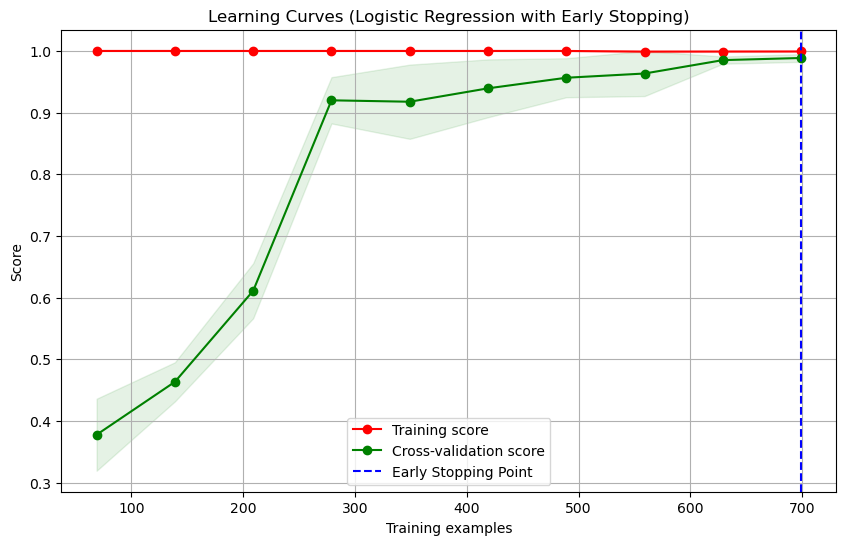

In [53]:
# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Logistic Regression with Early Stopping)")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Plot training curve
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot testing curve
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.axvline(x=best_train_size, color='b', linestyle='--', label='Early Stopping Point')

plt.legend(loc="best")
plt.grid()
plt.show()

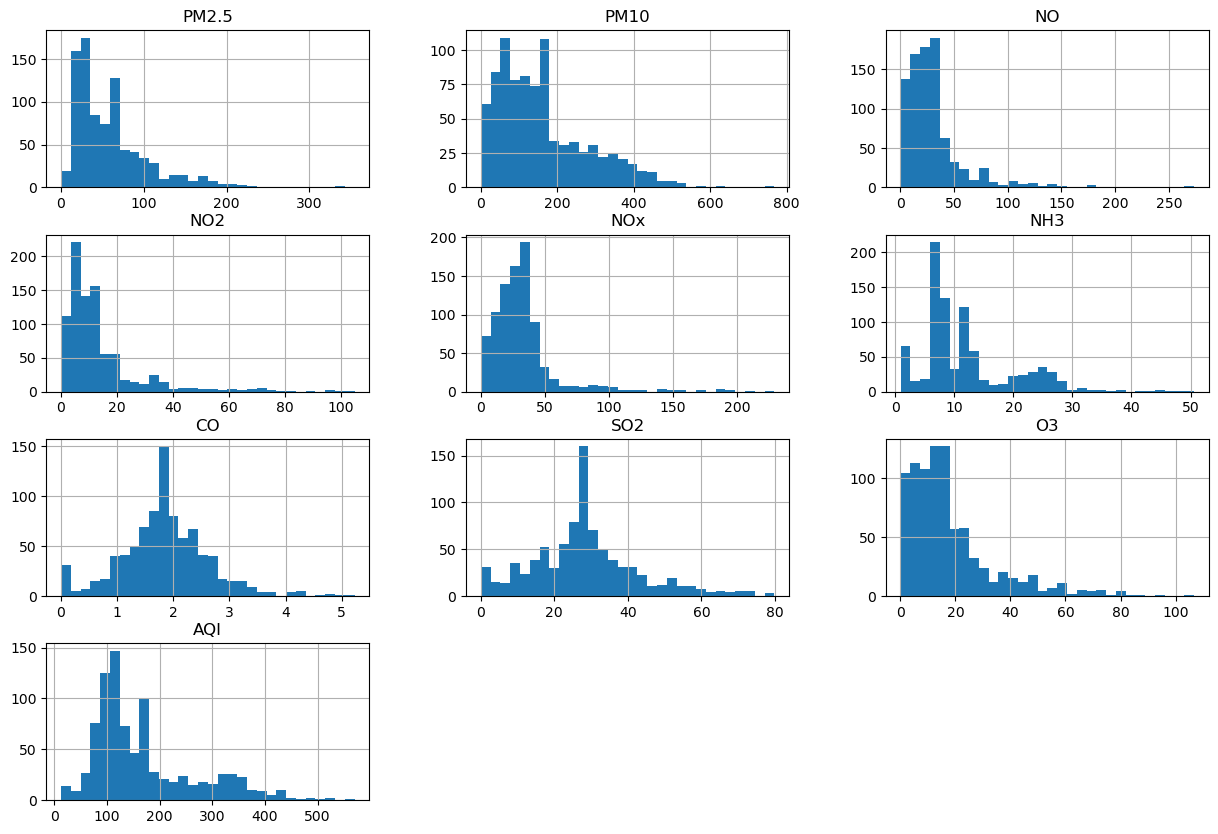

In [54]:
# EDA - Exploratory Data Analysis
# Histogram of numerical features
imputed_df.hist(bins=30, figsize=(15, 10))
plt.show()

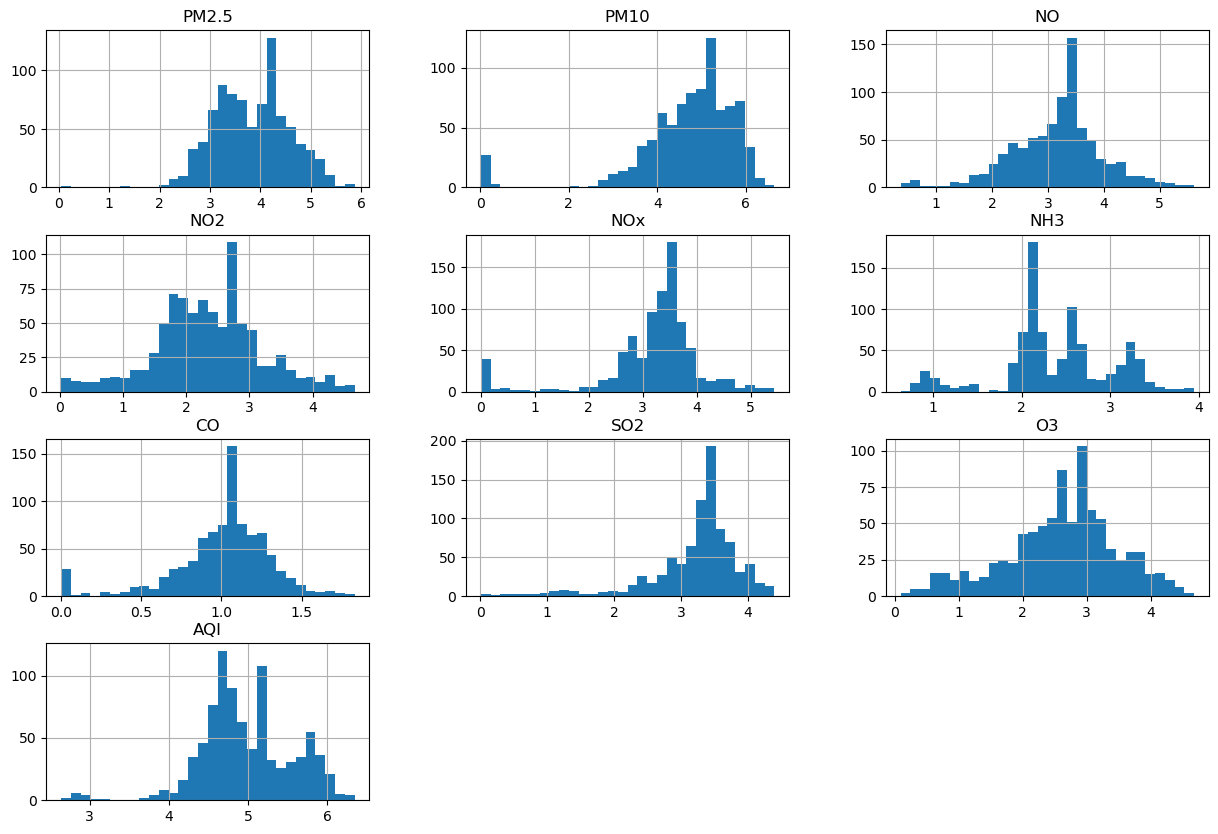

In [55]:
# Symmetric transformation (log transformation to make data symmetric)
log_transformed_df = np.log1p(imputed_df)
log_transformed_df.hist(bins=30, figsize=(15, 10))
plt.show()

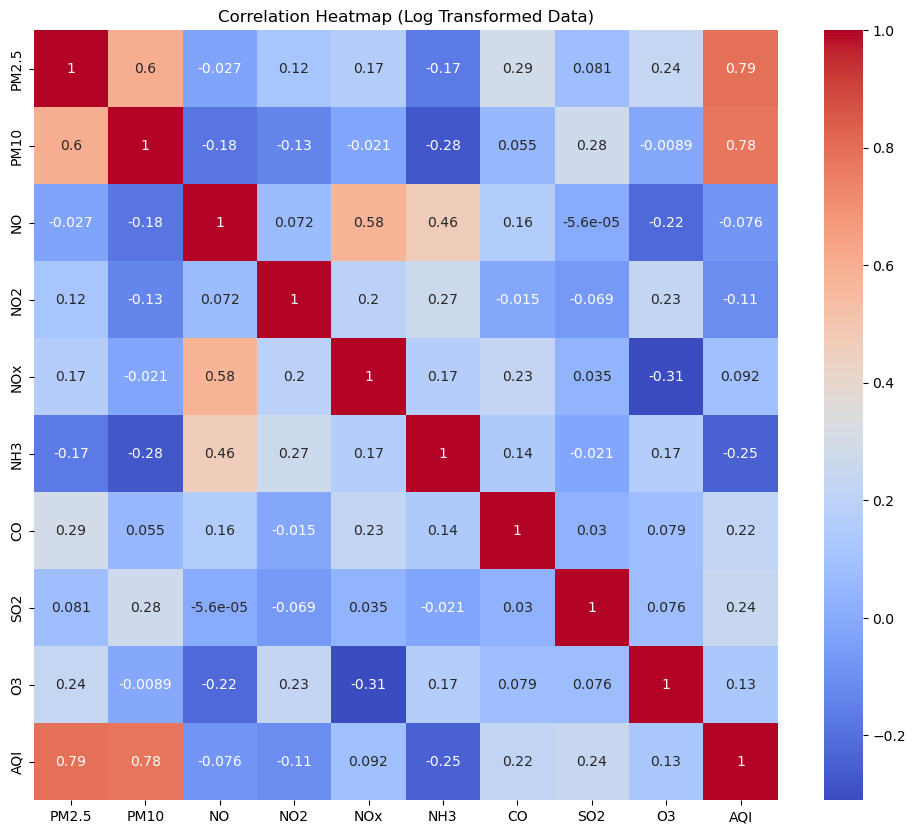

In [56]:
# Correlation heatmap
corr_matrix = log_transformed_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Log Transformed Data)')
plt.show()

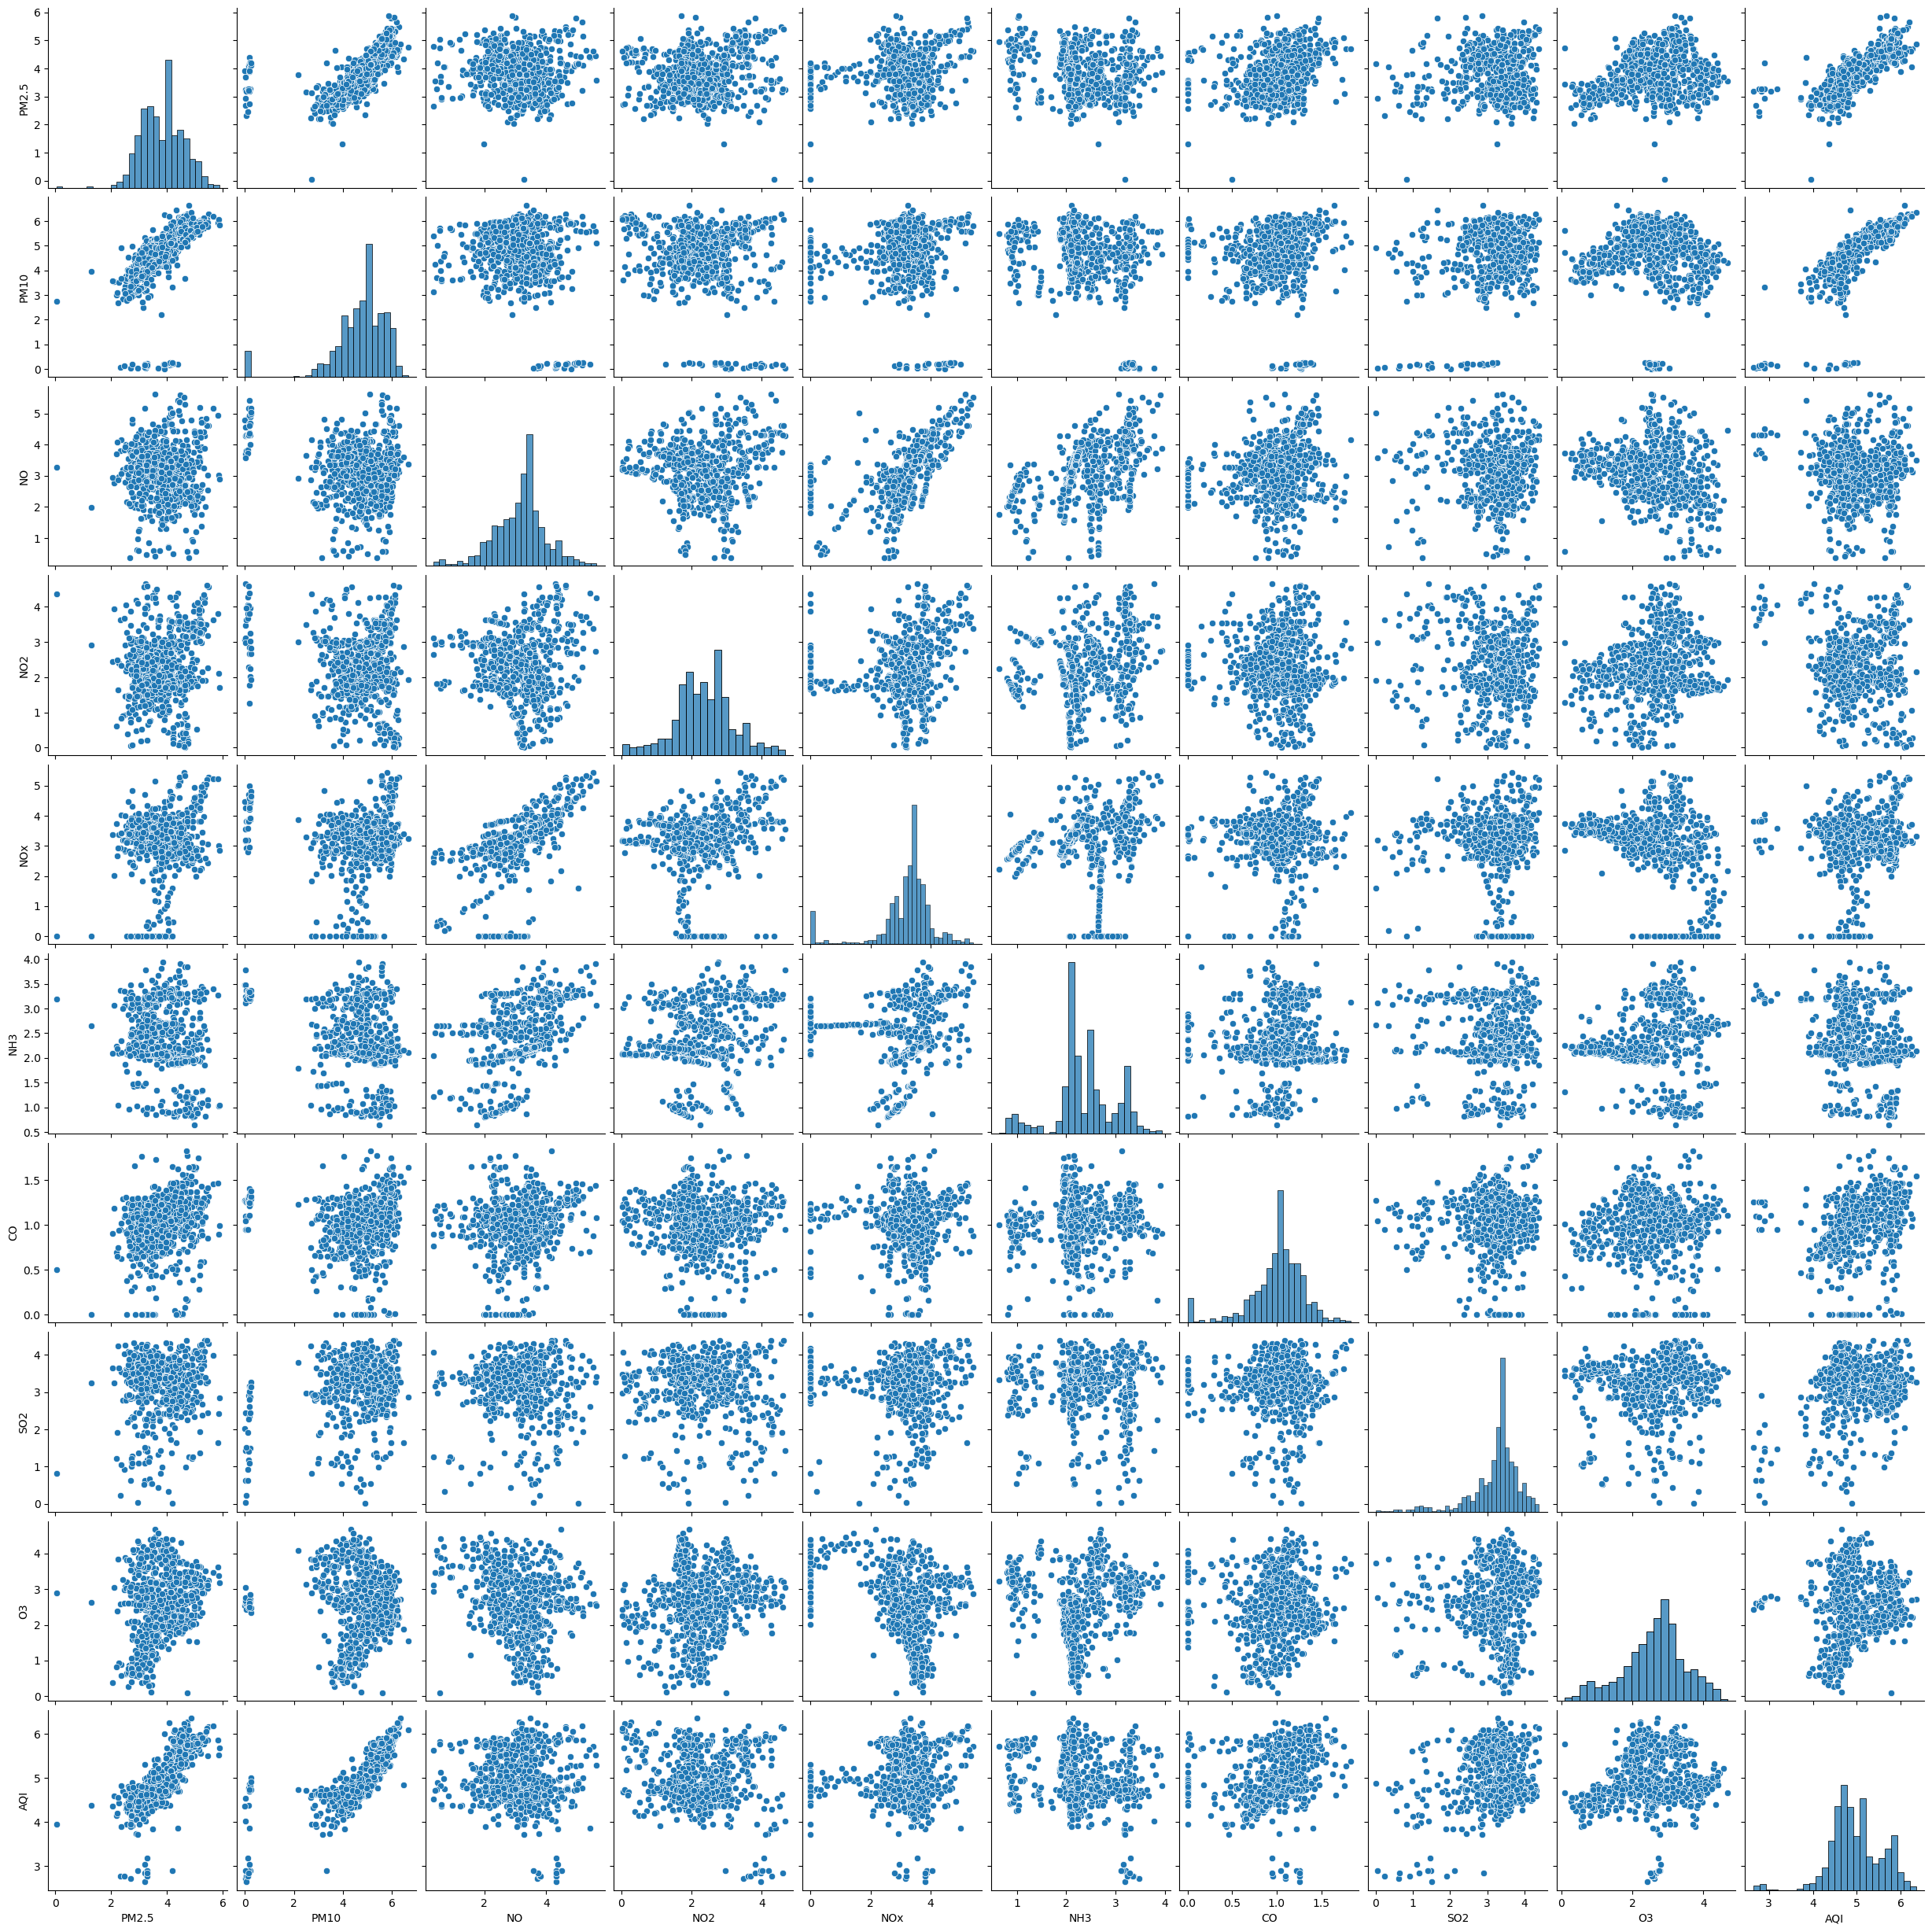

In [57]:
# Pair plot
sns.pairplot(log_transformed_df)
plt.show()


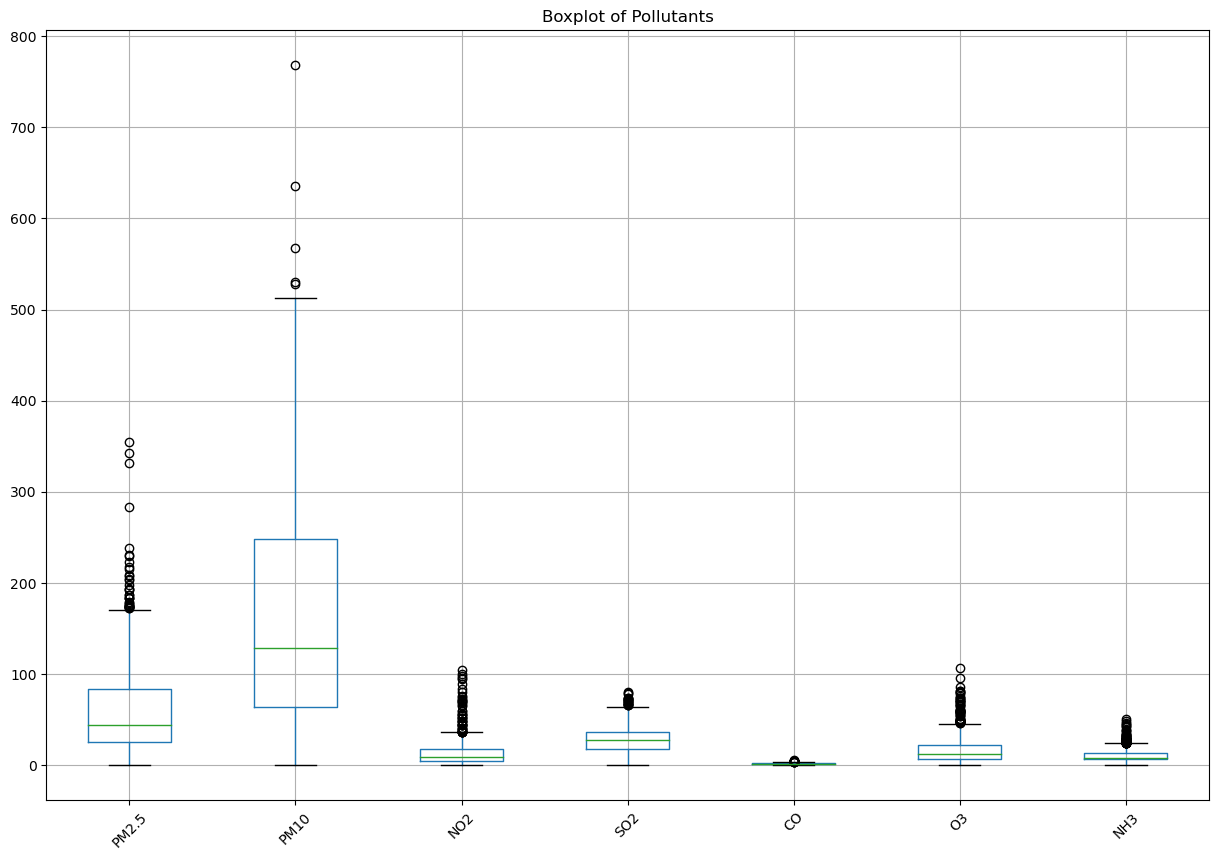

In [58]:
# Boxplot of pollutants
plt.figure(figsize=(15, 10))
df.boxplot(column=['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3'])
plt.title('Boxplot of Pollutants')
plt.xticks(rotation=45)
plt.show()

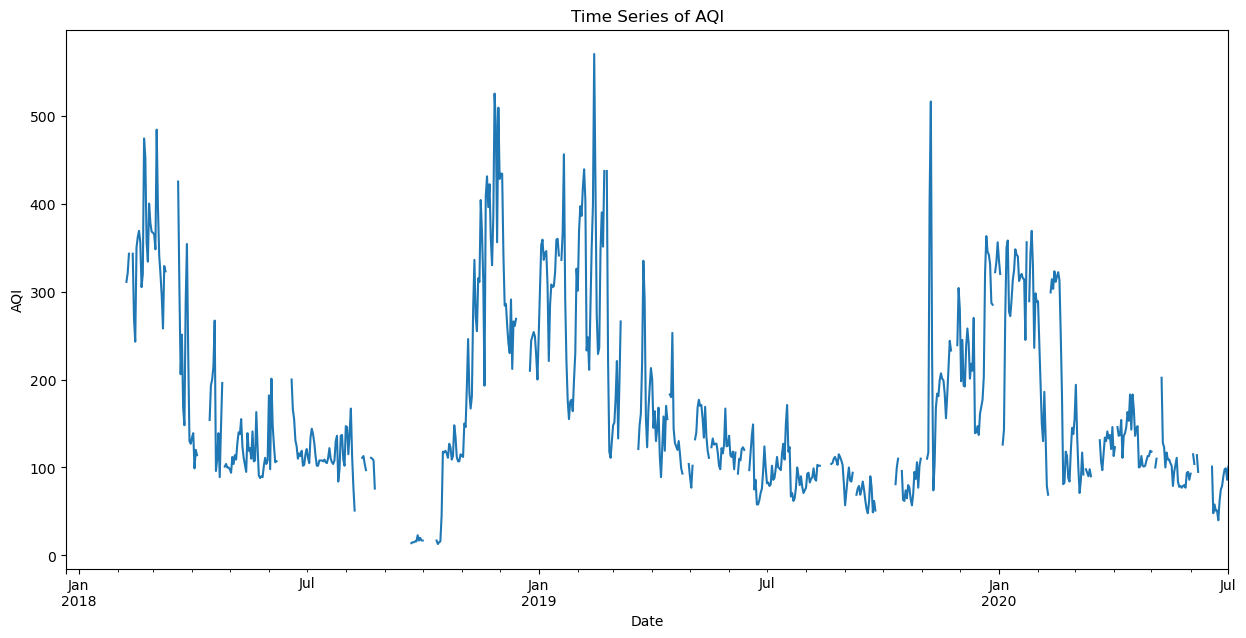

In [59]:
# Time series analysis of AQI
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(15, 7))
df['AQI'].plot()
plt.title('Time Series of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

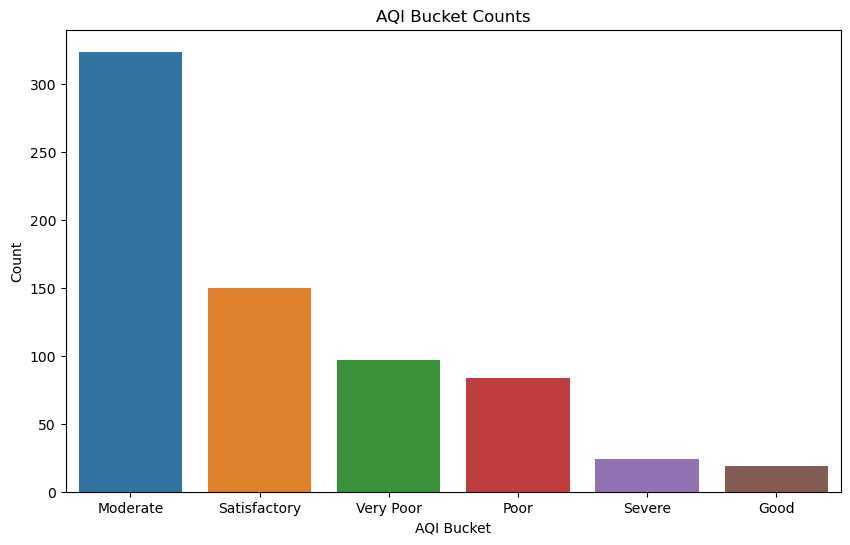

In [60]:
# AQI Bucket counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index)
plt.title('AQI Bucket Counts')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()
